In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
x1 = [random.randint(1,4) for x in range(0,25)]
x2 = [random.randint(1,4) for x in range(0,25)]
y = [ 2*x1[x]+3*x2[x]+random.randint(0,1) for x in range(0,25)]

In [3]:
dictt = {'x1':x1, 'x2':x2, 'y':y}
df = pd.DataFrame(dictt)

In [4]:
df.to_csv('sample.csv',index=False)

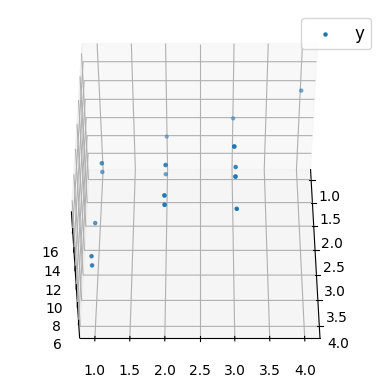

In [5]:
def view_dataset(dictt):
    x = []
    y = []
    random_x1 = np.array(dictt['x1'])
    random_x2 = np.array(dictt['x2'])
    for i in range(len(random_x1)):
        x1 = random_x1[i]
        x2 = random_x2[i]
        x.append([1, x1, x2])
        y.append(dictt['y'][i])
    return np.array(x), np.array(y)
 
x, y = view_dataset(dictt)
 
mpl.rcParams['legend.fontsize'] = 12
 
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
 
ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)
 
plt.show()

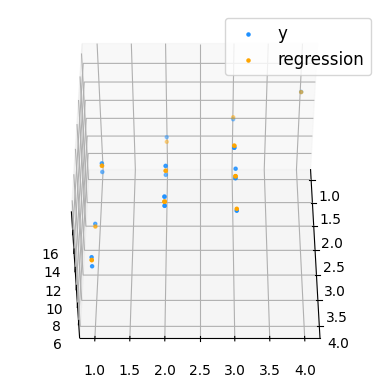

In [6]:
def mse(coef, x, y):
    return np.mean((np.dot(x, coef) - y)**2)/2

 
def gradients(coef, x, y):
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis=1)


def multilinear_regression(coef, x, y, lr, b1=0.9, b2=0.999, epsilon=1e-8):
    prev_error = 0
    m_coef = np.zeros(coef.shape)
    v_coef = np.zeros(coef.shape)
    moment_m_coef = np.zeros(coef.shape)
    moment_v_coef = np.zeros(coef.shape)
    t = 0
 
    while True:
        error = mse(coef, x, y)
        if abs(error - prev_error) <= epsilon:
            break
        prev_error = error
        grad = gradients(coef, x, y)
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t)
        moment_v_coef = v_coef / (1-b2**t)
 
        delta = ((lr / moment_v_coef**0.5 + 1e-8) *
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t)))
 
        coef = np.subtract(coef, delta)
    return coef
 

coef = np.array([0, 0, 0])
c = multilinear_regression(coef, x, y, 1e-1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
 
ax.scatter(x[:, 1], x[:, 2], y, label='y',
           s=5, color="dodgerblue")
 
ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2],
           label='regression', s=5, color="orange")
 
ax.view_init(45, 0)
ax.legend()
plt.show()